In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math

import librosa
import librosa.display

from pydub import AudioSegment


import warnings
warnings.filterwarnings('ignore')

/home/prasanna/.local/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
epochs_all = 200
NUM_CLASSES = 10 

In [3]:
path='./data'
genres=os.listdir(os.path.join(path,'genres_original/'))
print(genres)

['blues', 'disco', 'rock', 'country', 'pop', 'jazz', 'reggae', 'hiphop', 'classical', 'metal']


In [4]:
# Import 1 file
y, sr = librosa.load(f'./data/genres_original/reggae/reggae.00036.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


#### Visualizing one audio from each genre

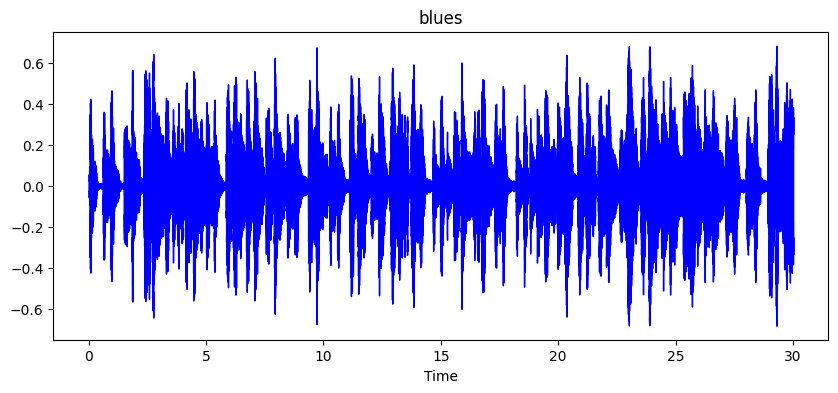

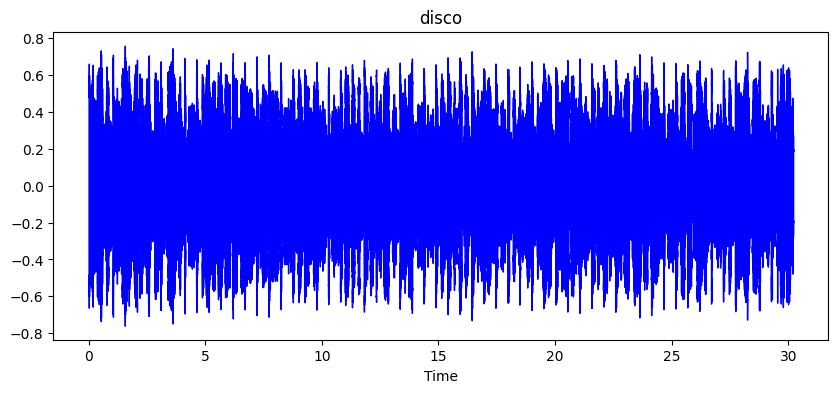

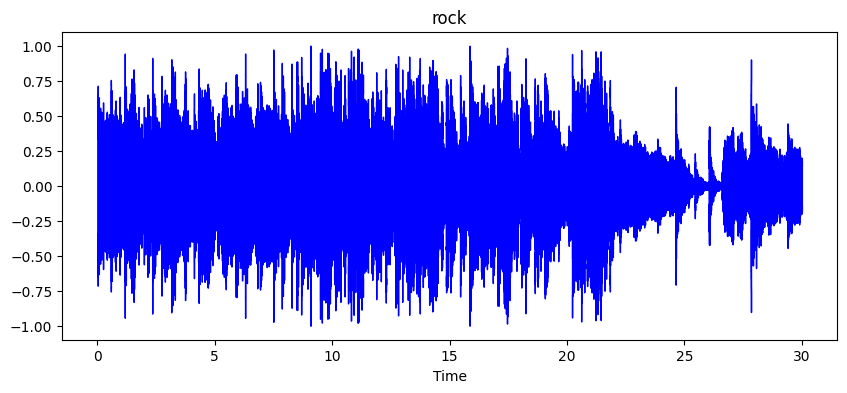

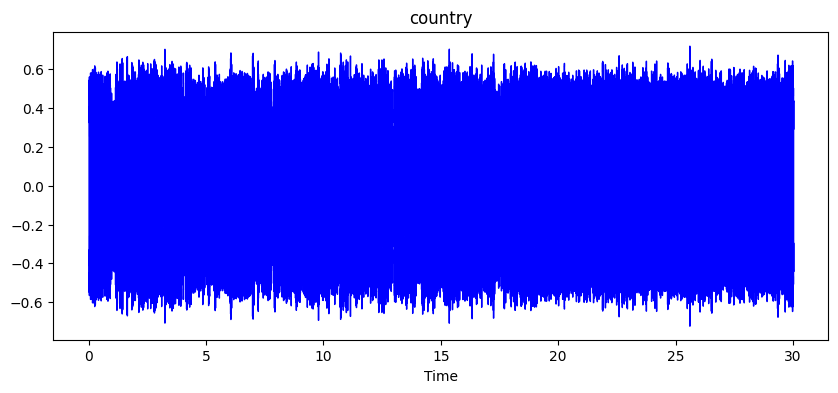

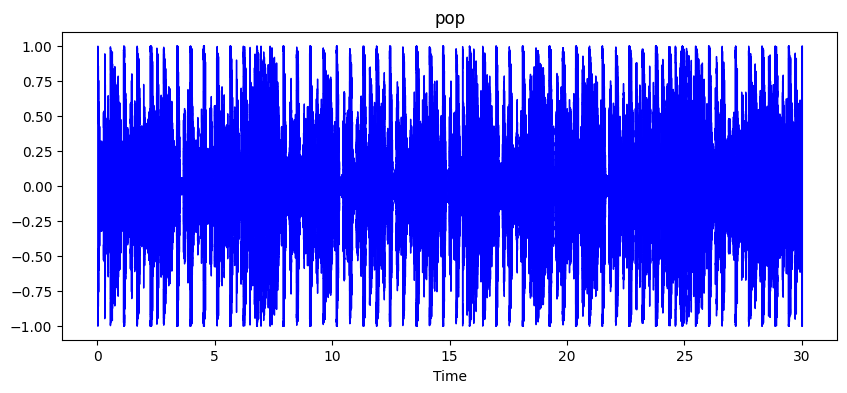

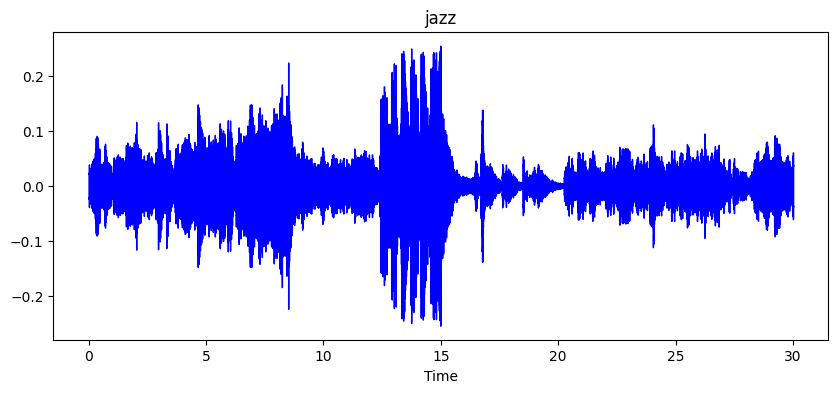

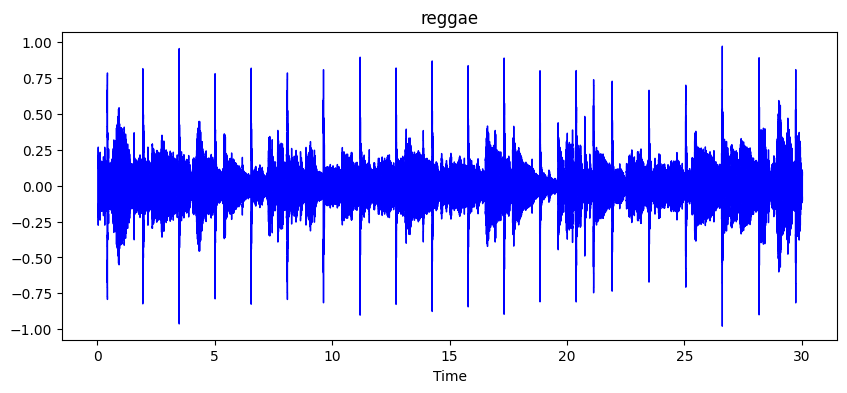

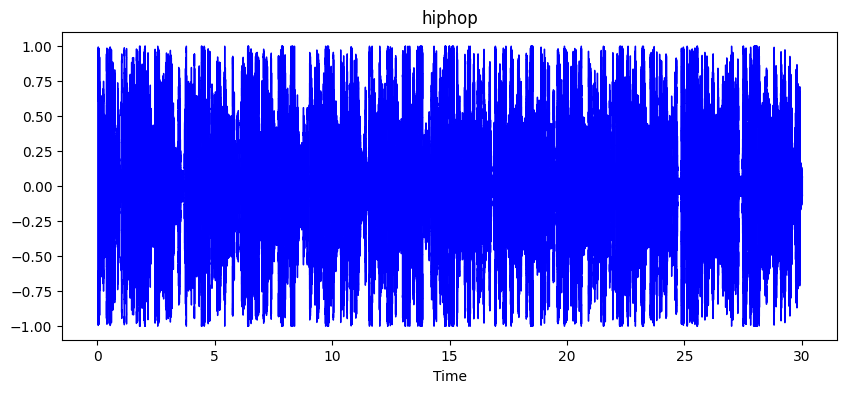

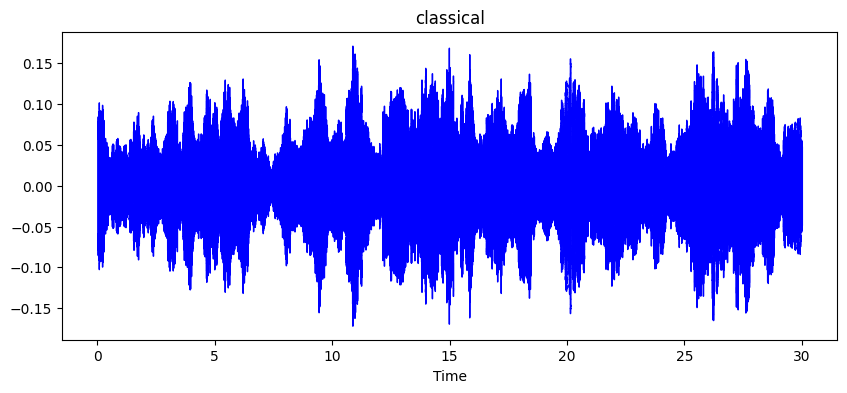

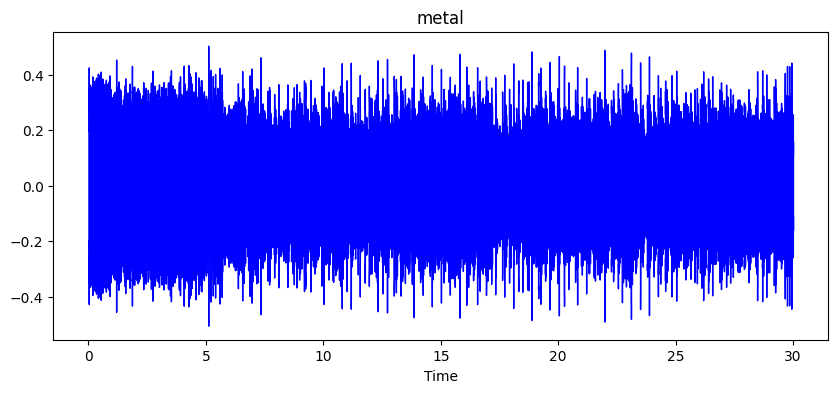

In [5]:
for i in genres:
    aud,sr=librosa.load(os.path.join(path,'genres_original',i,f'{i}.00001.wav'))
    plt.figure(figsize=(10,4))
    librosa.display.waveshow(y=aud,sr=sr,color='b')
    plt.title(f'{i}')

### Slicing audio in 3 sec chunks and extracting features
1. chroma_stft:  It creates a heatmap that shows how the pitch of sound changes over time
2. rms: Amplitude is squared, average overtime and then square root of the result.
3. spectral centroid: It represents the frequency where center of mass of the signal is located.
4. spectral bandwidth: It represents the width of band of signal at one half of the max height of the frequency.
5. spectral rolloff: It measures the shape of the signal. It represents a frequency at which high frequency declines to 0.
6. zero crossing rate: It measures the smoothness of the signal. It represents how many times a frequency of sound crosses zero at a particular time interval. For example, a percusive metal sound crosses zero more than a man speaking.
7. harmonic
8. mfcc: Selects a compressed feature from mel spectogram which are more relevant in computing the essential quality of the sound.

In [9]:
def extract_features(y, sr):
    features = np.array([])
    chroma_stft = np.mean(np.abs(librosa.feature.chroma_stft(y=y, sr=sr)).T, axis=0)
    print(chroma_stft.shape)
    rms = np.mean(np.abs(librosa.feature.rms(y=y)).T, axis=0)
    print(rms.shape)
    sp_centroid = np.mean(np.abs(librosa.feature.spectral_centroid(y=y)).T, axis=0)
    print(sp_centroid.shape)
    sp_bandwidth = np.mean(np.abs(librosa.feature.spectral_bandwidth(y=y)).T, axis=0)
    print(sp_bandwidth.shape)
    sp_rolloff = np.mean(np.abs(librosa.feature.spectral_rolloff(y=y)).T, axis=0)
    print(sp_rolloff.shape)
    zcr = np.mean(np.abs(librosa.feature.zero_crossing_rate(y=y)).T, axis=0)
    print(zcr.shape)
    harmony = [np.mean(np.abs(librosa.effects.harmonic(y=y)).T, axis=0)]
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr).T, axis=0)
    print(mfcc.shape)
    features = np.hstack([features, chroma_stft, rms, sp_centroid, sp_bandwidth, sp_rolloff, zcr, harmony, mfcc])
    return features

In [ ]:
'chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7',
'chroma_stft8', 'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12', 'rms', 'sp_centroid',
'sp_bandwidth', 'sp_rolloff', 'zcr', 'harmony', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
'mfcc19', 'mfcc20'

In [90]:
chunk_size = 3
cnt = 0
features_t = []
label_t = []
if not os.path.exists(os.path.join(path,'genres_chunks/')):
    os.mkdir(os.path.join(path,'genres_chunks/'))
dir_ch = os.path.join(path,'genres_chunks/')

for genre in os.listdir(os.path.join(path,'genres_original/')):
    print(genre)
    if not os.path.exists(os.path.join(dir_ch, genre)):
        os.mkdir(os.path.join(dir_ch, genre))
    for file in os.listdir(os.path.join(path,'genres_original/', genre)):
        print(cnt)
        try:
            newAudio = AudioSegment.from_wav(os.path.join(path,'genres_original/', genre, file))
            t1 = 0
            t2 = 3000
            for t in range(0, int(newAudio.duration_seconds)*1000, 3000):
                if t != 0:
                    t1 = t
                    t2 = t1+3000
                if t+3000 > int(newAudio.duration_seconds)*1000:
                    t1 = t
                    t2 = int(newAudio.duration_seconds)*1000
                audo_extract = newAudio[t1:t2]
                filename = os.path.join(path,'genres_chunks/', genre, '.'.join(file.split('.')[:2])+str(t)+'.wav')
                audo_extract.export(filename, format="wav")
                y, sr = librosa.load(filename)
                dt = extract_features(y, sr)
#                 features.append(extract_features(y, sr))
#                 label.append(genre)
                os.remove(filename)
                break
        except:
            pass
        cnt += 1

In [91]:
features_arr = np.array(features)
features_arr.shape

In [13]:
cols = ['chroma_stft1', 'chroma_stft2', 'chroma_stft3', 'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7',
'chroma_stft8', 'chroma_stft9', 'chroma_stft10', 'chroma_stft11', 'chroma_stft12', 'rms', 'sp_centroid',
'sp_bandwidth', 'sp_rolloff', 'zcr', 'harmony', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
'mfcc19', 'mfcc20']

In [20]:
data_df = pd.DataFrame(features_arr, columns=cols)
data_df.shape

(9990, 38)

In [21]:
data_df.head()

,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.115008,0.070821,0.110235,0.111454,0.286969,0.616469,0.383925,0.331216,0.352641,0.334628,...,-6.233297,2.519584,-9.550787,5.362345,-4.710114,-1.023269,-4.038343,0.926600,2.861304,3.998769
1,0.108230,0.172586,0.326189,0.388928,0.450493,0.607353,0.424356,0.249631,0.214925,0.313362,...,-4.783366,6.568990,-6.601868,9.961569,-2.513963,3.559850,-12.157242,4.874400,2.796084,1.561807
2,0.192627,0.222793,0.245068,0.319190,0.413318,0.416444,0.405816,0.385793,0.295773,0.333178,...,-0.272806,2.620997,-3.878243,12.498473,-3.643473,1.005833,-6.745497,-1.440580,-0.224055,-4.777328
3,0.289926,0.115784,0.087084,0.080509,0.073909,0.092954,0.141110,0.224882,0.321075,0.361898,...,-9.604132,3.198344,-3.946916,17.137974,9.613768,10.823350,-0.533380,-3.731239,-7.018328,-7.417590
4,0.467646,0.295379,0.275957,0.485702,0.475017,0.557351,0.353820,0.264942,0.313469,0.322508,...,-6.897340,10.105643,-4.753747,9.890526,-1.012685,1.482508,-4.625690,6.484686,7.523729,3.649902


In [45]:
data_df['label'] = label
data_df.head()

,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.115008,0.070821,0.110235,0.111454,0.286969,0.616469,0.383925,0.331216,0.352641,0.334628,...,2.519584,-9.550787,5.362345,-4.710114,-1.023269,-4.038343,0.926600,2.861304,3.998769,blues
1,0.108230,0.172586,0.326189,0.388928,0.450493,0.607353,0.424356,0.249631,0.214925,0.313362,...,6.568990,-6.601868,9.961569,-2.513963,3.559850,-12.157242,4.874400,2.796084,1.561807,blues
2,0.192627,0.222793,0.245068,0.319190,0.413318,0.416444,0.405816,0.385793,0.295773,0.333178,...,2.620997,-3.878243,12.498473,-3.643473,1.005833,-6.745497,-1.440580,-0.224055,-4.777328,blues
3,0.289926,0.115784,0.087084,0.080509,0.073909,0.092954,0.141110,0.224882,0.321075,0.361898,...,3.198344,-3.946916,17.137974,9.613768,10.823350,-0.533380,-3.731239,-7.018328,-7.417590,blues
4,0.467646,0.295379,0.275957,0.485702,0.475017,0.557351,0.353820,0.264942,0.313469,0.322508,...,10.105643,-4.753747,9.890526,-1.012685,1.482508,-4.625690,6.484686,7.523729,3.649902,blues


In [46]:
data_df.to_csv('features.csv')

### Classification

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# from xgboost import XGBClassifier, XGBRFClassifier
# from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
y = data_df['label'] # genre variable.
X = data_df.loc[:, data_df.columns != 'label']

In [55]:
y

0       blues
1       blues
2       blues
3       blues
4       blues
        ...  
9985    metal
9986    metal
9987    metal
9988    metal
9989    metal
Name: label, Length: 9990, dtype: object

In [57]:
# Label Encoding

le = preprocessing.LabelEncoder()
le.fit(y)
y_en = le.transform(y)
y_en

array([0, 0, 0, ..., 6, 6, 6])

In [62]:
np.unique(y_en)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.3, random_state=42)

In [64]:
X_train.shape, X_test.shape

((6993, 38), (2997, 38))

In [82]:
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}
                   
# with GridSearch  
grid_search_KNN = GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid=parameters_KNN,
                              scoring='accuracy',
                              n_jobs=-1,
                              cv=5)

In [83]:
grid_search_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': (20, 40, 1),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': (1, 10, 1), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [86]:
print(grid_search_KNN.best_params_ ) 

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [87]:
print('Best Score - KNN:', grid_search_KNN.best_score_ )

Best Score - KNN: 0.87072883655912


In [85]:
preds = grid_search_KNN.predict(X_test)
confusion_matrix(y_test, preds)

array([[293,   1,   4,   2,   1,   9,   2,   0,   5,   2],
       [  4, 289,   4,   0,   0,  13,   0,   1,   1,   3],
       [  9,  12, 227,   3,   5,  12,   0,   6,  12,  15],
       [  2,   5,   0, 270,   3,   5,   2,   4,   2,  15],
       [  3,   0,   3,   3, 250,   2,   0,   4,   3,   0],
       [  1,   7,   6,   2,   0, 257,   0,   2,   5,   3],
       [  5,   0,   2,   1,   1,   0, 277,   0,   2,  13],
       [  0,   0,   2,  10,   8,   3,   0, 275,   7,   5],
       [  1,   1,   7,   4,   3,   3,   0,   1, 282,   1],
       [  6,   2,  11,  15,   0,  10,   2,   4,   9, 230]])

In [89]:
accuracy_score(y_test, preds)

0.8842175508842175